<a href="https://colab.research.google.com/github/riamary18/Handwritten_Number_Recognition/blob/main/Handwritten_Number_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

##Creating a Callback
Here, we are creating a callback which will be called after every epoch ends. The accuracy is monitored and if the accuracy reaches a target goal of 98%, we stop the model from training further. This will prevent overfitting and is known as a regularization technique.

In [ ]:
class MyCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('accuracy')>0.98):
      print("Model has reached 98% accuracy, model will stop training now...")
      self.model.stop_training=True
callbacks=MyCallbacks()

##Exporting Dataset
We will use the MNIST dataset in this project. The MNIST dataset is a widely used collection of handwritten digits that is commonly employed as a benchmark in the field of machine learning and computer vision.

In [ ]:
mnist = tf.keras.datasets.mnist

##Data Analysis and Processing

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


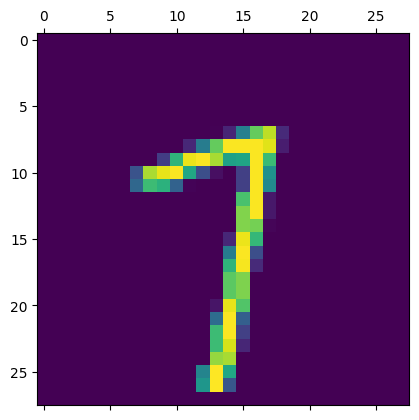

In [ ]:
plt.matshow(x_train[42])

In [ ]:
x_train,x_test=x_train/255,x_test/255

In [ ]:
#This step is required only if you are not going to include the Flatten() layer in your model
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [ ]:
#This step is required only if you are not going to include the Flatten() layer in your model
x_test_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened.shape

(60000, 784)

##Creating a Model
We will add three layers to this model:
 * Flatten Layer: It is used to convert the multi-dimensional output of the convolutional and pooling layers into a one-dimensional array. This is necessary when transitioning from the convolutional and pooling layers to fully connected layers, as fully connected layers expect input data in a flat, one-dimensional format.
 * 2 Dense Layers:  It serves as the classifier, taking the features extracted by the preceding convolutional and pooling layers and learning to map them to the output classes. It introduces non-linearity through activation functions and is a crucial component in the end-to-end process of feature extraction and classification in CNNs.

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train,
          y_train,
          epochs=5,
          callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0579 - accuracy: 0.9825


##Sample Prediction

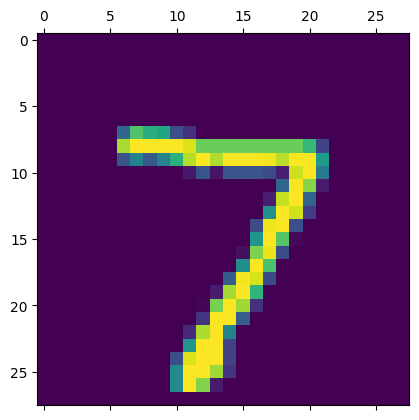

In [ ]:
plt.matshow(x_test[0])

In [ ]:
len(y_pred),len(y_test)

(60000, 10000)

In [ ]:
y_pred=model.predict(x_test)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([5.3253257e-01, 4.2115096e-07, 8.6266780e-01, 9.5409501e-01,
       5.6344093e-06, 6.1435197e-03, 5.6778566e-07, 9.9998236e-01,
       7.3319447e-01, 4.1399428e-01], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

7